# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

### Sinh viên không được phép sử dụng internet
### Sinh viên sau khi làm bài xong xuất ra file PDF đồng thời nộp lên Fit-lab và push lên git-hub
### Sinh viên làm bắt đầu làm bài từ 15h40 - 18h00

In [ ]:
# Họ và Tên: Đinh Thạch Bảo
# MSSV: 207CT27605

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X, y = load_dataset()
print(X.shape, y.shape)

(100, 4) (100,)


Kết quả: (100, 4) (100,)

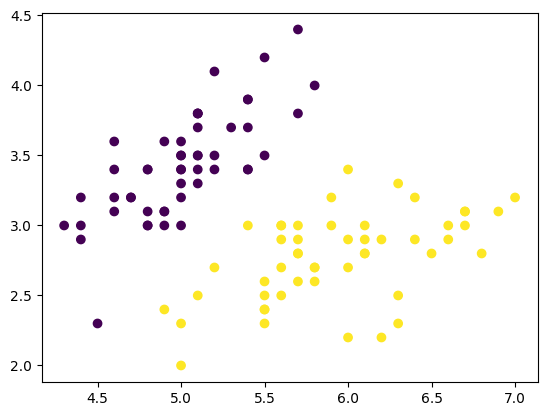

In [ ]:
#Trực quan hóa dữ liệu data
#Điền code ở đây
plt.scatter(X[:,0], X[:,1],c=y)




Kết quả

![image.png](attachment:image.png)

In [ ]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1) # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
        n_features = X.shape[1]



    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressTorch(n_features)


In [ ]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)           #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]           #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [ ]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Kiểm tra dữ liệu
for i, (inputs, labels) in enumerate(dataloader):
    print(f"Batch {i+1}:")
    print("Inputs:", inputs)
    print("Labels:", labels)
    if i == 2:  # In ra 3 batch đầu tiên
        break


Batch 1:
Inputs: tensor([[6.4000, 3.2000, 4.5000, 1.5000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.3000, 3.7000, 1.5000, 0.2000]])
Labels: tensor([[1.],
        [0.],
        [1.],
        [0.]])
Batch 2:
Inputs: tensor([[5.7000, 2.8000, 4.5000, 1.3000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [5.7000, 3.0000, 4.2000, 1.2000]])
Labels: tensor([[1.],
        [0.],
        [1.],
        [1.]])
Batch 3:
Inputs: tensor([[6.2000, 2.2000, 4.5000, 1.5000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.9000, 3.2000, 4.8000, 1.8000]])
Labels: tensor([[1.],
        [0.],
        [0.],
        [1.]])


In [ ]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size = int(0.7 * len(dataset))                  # 70%
test_size = len(dataset) - train_size                 #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [ ]:
# Tạo DataLoader cho tập huấn luyện và tập kiểm tra với batch_size = 64
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Kiểm tra dữ liệu
for i, (inputs, labels) in enumerate(train_loader):
    print(f"Train Batch {i+1}:")
    print("Inputs:", inputs)
    print("Labels:", labels)
    if i == 2:  # In ra 3 batch đầu tiên
        break

for i, (inputs, labels) in enumerate(test_loader):
    print(f"Test Batch {i+1}:")
    print("Inputs:", inputs)
    print("Labels:", labels)
    if i == 2:  # In ra 3 batch đầu tiên
        break


Train Batch 1:
Inputs: tensor([[6.0000, 2.9000, 4.5000, 1.5000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [5.3000, 3.7000, 1.5000, 0.2000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.

In [ ]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.7 * len(dataset))  # 70%
test_size = len(dataset) - train_size  # 30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Tạo DataLoader cho tập huấn luyện và tập kiểm tra với batch_size = 64
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features)

criterion = nn.BCELoss()  # Hàm mất mát Binary Cross-Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Trình tối ưu hóa SGD với learning rate = 0.01

# Kiểm tra dữ liệu
for i, (inputs, labels) in enumerate(train_loader):
    print(f"Train Batch {i+1}:")
    print("Inputs:", inputs)
    print("Labels:", labels)
    if i == 2:  # In ra 3 batch đầu tiên
        break

for i, (inputs, labels) in enumerate(test_loader):
    print(f"Test Batch {i+1}:")
    print("Inputs:", inputs)
    print("Labels:", labels)
    if i == 2:  # In ra 3 batch đầu tiên
        break


Train Batch 1:
Inputs: tensor([[5.2000, 3.5000, 1.5000, 0.2000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.

In [ ]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.7 * len(dataset))  # 70%
test_size = len(dataset) - train_size  # 30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Tạo DataLoader cho tập huấn luyện và tập kiểm tra với batch_size = 64
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Bước 4: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features)

criterion = nn.BCELoss()  # Hàm mất mát Binary Cross-Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Trình tối ưu hóa SGD với learning rate = 0.01
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 0.7229, Test Loss: 0.7988, Test Accuracy: 0.4000
Epoch 2/200, Train Loss: 0.6817, Test Loss: 0.7816, Test Accuracy: 0.4000
Epoch 3/200, Train Loss: 0.6707, Test Loss: 0.7618, Test Accuracy: 0.4000
Epoch 4/200, Train Loss: 0.6586, Test Loss: 0.7321, Test Accuracy: 0.4000
Epoch 5/200, Train Loss: 0.6442, Test Loss: 0.7001, Test Accuracy: 0.4000
Epoch 6/200, Train Loss: 0.6315, Test Loss: 0.6836, Test Accuracy: 0.4000
Epoch 7/200, Train Loss: 0.6229, Test Loss: 0.6609, Test Accuracy: 0.4000
Epoch 8/200, Train Loss: 0.6147, Test Loss: 0.6635, Test Accuracy: 0.4000
Epoch 9/200, Train Loss: 0.6079, Test Loss: 0.6643, Test Accuracy: 0.4000
Epoch 10/200, Train Loss: 0.6019, Test Loss: 0.6609, Test Accuracy: 0.4000
Epoch 11/200, Train Loss: 0.5954, Test Loss: 0.6349, Test Accuracy: 0.4333
Epoch 12/200, Train Loss: 0.5864, Test Loss: 0.6098, Test Accuracy: 0.6000
Epoch 13/200, Train Loss: 0.5809, Test Loss: 0.5960, Test Accuracy: 0.8000
Epoch 14/200, Train Loss: 0.5754, 

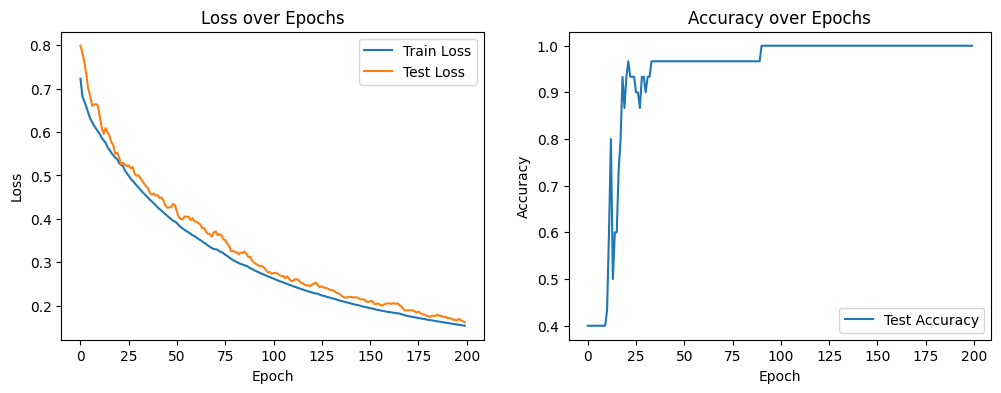

In [ ]:
# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

#Kết quả:

![image.png](attachment:image.png)